In [18]:
% matplotlib inline

# Introduction to Python Programming

## 5. Plotting Data with Matplotlib and Bokeh

#### Opening Files

What we have been doing so far has required you to type the data into the programs by hand, which is a bit cruel. For this worksheet, we will be using a larger dataset (still tiny by many standards) and you can download a file containing the data from [GitHub](https://github.com/tobyhodges/ITPP/blob/v2/speciesDistribution.txt). Just right-click 'Raw' at the top of the file content and download/save the linked file into the same directory as you are keeping the Python scripts.

Of course, this requires that we know how to get data out of the file and into our Python program and that is what we are going to do in this worksheet. Specifically we are talking about reading data out of text files. Binary files face their own challenges, and I am not going to get into that in this course since handling them is very dependent on the implementation of the binary file. In any case, for a number of significant classes of binary files, such as images, BAM files or NetCDF formatted data, there are already Python modules to enable you to access the data in a simple way. But in any case, we will look at text files for now and firstly we need to know how to open them.

If you have downloaded the file, you should make sure that it is saved into the same folder where you are going to save the python programs that you will use to analyse it. We will start simple, just by opening the file at the Python shell prompt.

In [19]:
f = open('speciesDistribution.txt', 'r')

The file is now open, and `f` is a variable referring to a _file_ data type.  Obviously, the file argument for `open` is a string containing the filename, but the `'r'` probably needs to be explained. This argument is called the file mode, and `'r'` means that you only want to read data. If you specify `'w'`, it means that you want to write data into the file, which we will talk about later. One very important point is that when you open a file that already exists for writing, the contents of the file are cleared, and can’t be recovered. If you instead want to append data to an existing file you should specify `'a'` as the mode. If you specify `'r+'` then you can read and write to the file. These are the same regardless of the operating system that you are working on, but Windows has a few specific ones of it’s own, which you shouldn’t use if you can avoid them. 

As you might expect by now, file objects have their own methods and you can use some of these to read data from the file.  The easiest way of doing this is to use `.readlines()`:

In [20]:
lines = f.readlines()

The variable lines now refers to a list of strings containing each of the lines in the file. Try looking at one or two of them. If you didn’t look at the contents of the file before you opened it with your program, have a look at it now. If you compare `lines[1]` in Python with the second line in the file, you will see some differences. Most obvious is the presence of a `\n` at the end of each line in the Python list. These are _newline characters_ and we need to remember to remove these when we process the data from the file. Although it looks like two characters, it is what is called an escape character: just a single character but one with special meaning to the program and which we cannot normally see in a string. On most of the other lines there is another escape `\t`, which is a _tab character_. Again, we need to remember this for use later. Tabs are often used to separate data items on the lines of text files because, amongst other reasons, they are much less likely to occur within the data than spaces.

#### Getting Data from Files

Using `.readlines()` to create a list containing all of the lines is nice and simple, but has a major drawback. It’s fine when your file is small enough to read all of the lines into memory, but if you are reading a 32Gb SAM file, you are likely to run into problems. Here, you want to read one line at a time, and process it. Python files do have a `.readline()` method that will read only one line, but it’s best to just use a `for` loop. Python has an idea of 'iterable' data types which you can put into `for` loops. We have seen two of these so far: the list and the dictionary. For a list you get each element in turn, and for a dictionary you get each key in turn. Strings are also iterable and return each character in turn. The point of mentioning this now is that files are also iterable, and Python tries to pass you exactly what we want: one line at a time. So we can start to write a program now to start processing this data file. 

__Note__ This will be the largest program you have written so far, and what I do when I am embarking on writing a large program is to start with just the basic structure and make sure that works then add to the program step by step and keep running it to make sure it is doing what I expect before it gets too complicated.

To begin, in an editor window

In [21]:
datafile = open('speciesDistribution.txt', 'r')
for line in datafile:
    print(line)

Site: Hetchell Wood N

A	12983

B	8493

C	948

D	9384

E	4942

G	9834

I	1293

J	9348

Site: Hetchell Wood S

A	9380

B	13928

D	949

E	19023

F	9384

G	948

H	9284

J	1093

K	3029

Site: Hagg Wood

A	2039

B	9394

C	19380

D	9102

E	932

G	893

H	5839

J	9302

L	984

Site: Scoreby Wood

A	920

B	3928

D	9301

E	19384

F	12949

H	3892

I	9192

K	912

Site: Grimston Wood

A	123

B	1340

C	11984

E	9389

F	4320

G	1283

J	8193

K	193

Site: Sutton Wood

A	883

B	293

C	893

D	18990

F	3910

G	930

H	1738

I	819

M	9934

Site: Wheldrake Wood

B	91

C	22649

D	2949

E	901

G	9204

H	2040

I	8173

L	6781

M	9184



OK, so far so good, the program is basically printing the whole file out to the Python Shell window. However, I forgot about the newline characters at the end of the lines. You have probably noticed that the `print` statement automatically adds a newline to the end of everything it prints, so now we are getting two after each line, which is why the output is double-spaced. So the first thing to do is to fix that, by removing the newline characters from the lines as we read them in. Strings have a `.strip()` method which removes any newlines, spaces or tabs (we called these characters 'whitespace') at the start and end of each line. So add the line

In [22]:
line = line.strip()

to the loop before the print statement (at the correct level of indentation) and try the program again.  Now the output should look single spaced.

In [23]:
datafile = open('speciesDistribution.txt', 'r')
for line in datafile:
    line = line.strip()
    print(line)

Site: Hetchell Wood N
A	12983
B	8493
C	948
D	9384
E	4942
G	9834
I	1293
J	9348
Site: Hetchell Wood S
A	9380
B	13928
D	949
E	19023
F	9384
G	948
H	9284
J	1093
K	3029
Site: Hagg Wood
A	2039
B	9394
C	19380
D	9102
E	932
G	893
H	5839
J	9302
L	984
Site: Scoreby Wood
A	920
B	3928
D	9301
E	19384
F	12949
H	3892
I	9192
K	912
Site: Grimston Wood
A	123
B	1340
C	11984
E	9389
F	4320
G	1283
J	8193
K	193
Site: Sutton Wood
A	883
B	293
C	893
D	18990
F	3910
G	930
H	1738
I	819
M	9934
Site: Wheldrake Wood
B	91
C	22649
D	2949
E	901
G	9204
H	2040
I	8173
L	6781
M	9184


#### Processing the File

If we look again at the file, we can see that it consists of two types of data. Some lines contain the names of sampling sites and some contain a letter and a number. The letters are taxon designators and the numbers represent abundance of that taxon at that particular site (in this case, as measured by high-throughput DNA sequencing of 18S rRNA). We need to process the two line types differently and store the information in a suitable data structure.

Take a moment to think about how you think we might go about doing that, and what the best data structure type to use might be for storing the taxon codes and counts for each site. Don’t worry if you find this a little confusing and/or daunting: we are going to work through it one step at a time, starting by identifying each site described in the data.

The lines with the site names in them all start with the substring `Site:`, so they are easy to recognise.  We can use the string’s `.startswith()` method in an if statement to identify these lines so that we can process them separately.  Try using this method at the Python command line so you understand how it works before putting it into the program.

#### _Exercise 5.1_

Change the program to only print out the lines that start with `Site:`

Once that works, remove the `Site:` substring (and the space that follows it) from the string and just print the actual site name. Make sure that you store the name in a variable at this point as well - we will need it later.

#### Starting to Build the Data Structure

Now that we have isolated the site names we can think some more about what kind of data structures we will use to store the data we read from the file. Remember what you learned in the previous worksheet, about how important it is to choose an appropriate data structure. In this case, we have some named sites and then some data corresponding to those sites. That to me sounds like a dictionary. The data we have for each site consists of several lines, which each contain a taxon code (the letter) and a count for that taxon. Again, this sounds like a dictionary.

So we need a dictionary keyed by each site name, for which the associated value is another dictionary, keyed by the taxon IDs with values that are the counts for that site. So we need to create a dictionary of dictionaries. As with the whole program, it’s probably best to start simple.

We need to create the top-level dictionary before we can populate it with the data from the file. We do this by defining an empty dictionary. You can do this by putting the line

In [24]:
sites = {}

just before the start of the loop that reads the file. This is often referred to as “initialising” a data structure, and is a strategy that you will use a lot when working with data read into Python from other sources. Now every time you find the name of a new site in the file, you need to create the entry in this dictionary for that site name. Again, the value associated with this site name needs to be a new, empty dictionary. The example below shows how you can extract the site name from a line and create a new dictionary for it.

In [25]:
datafile = open('speciesDistribution.txt', 'r')
for line in datafile:
    line = line.strip()
    if line.startswith('Site: '):  # you should have come up with something similar to
        siteName = line[6:]        # this in your solution to exercise .1 ...
        sites[siteName] = {}

#### _Exercise 5.2_

Change your program to create the empty dictionaries as above, then right at the end, outside the loop, get it to print out the keys for the sites dictionary. These should be all of the site names.

#### Splitting Lines and Converting Data

Now that we are creating a dictionary for each site, we just need to parse the taxon/count lines from the file and put them into the appropriate dictionary for their site. As is common, on these lines we have two items of data. (We know too that once we see one of these lines we must also have the site name, which we have kept in a variable since it was extracted from the `Site:` line.) We can split the line as we did before to get the separate fields. In this case there will be two fields and they are returned as a list, but we can unpack them directly into individual variables in the assignment statement if we want to. So, after inserting an `else:` statement to go with the `if` statement that contains the `.startswith()` test to find the site names, you could type (again with the appropriate level of indentation): 

`taxonID, count = line.split()`

Just a couple of words of caution.  Firstly, this will split the string on all whitespace characters.  This is fine in our case, but if any of your data were to contain spaces (for example if the single letter taxon names were classic binomial species names like _Homo sapiens_ instead), they would be split too.  You can limit to just tabs with:

`taxonID, count = line.split(‘\t’)`

That’s solved the first problem. The second issue here is the data types. Type the following at the Python shell prompt:

In [26]:
line = 'A\t29304'
taxonID, count = line.split('\t')
count

'29304'

In [27]:
count = count + 99

TypeError: Can't convert 'int' object to str implicitly

In [28]:
count = 29304
count

29304

In [29]:
count = count + 99

The first time that Python prints the value of count, it has quotation marks around it, and you get an error when you try to add 99 to it. The second time it doesn’t have quotation marks and you don’t receive an error when adding 99. This is because the first time, the value of count is not a number but a string representing the number. Perl programmers don’t have to worry about this kind of thing, because Perl will automatically convert things for you when it thinks it needs to. With Python we have to be a bit more careful and convert the data ourselves.  This is done with

In [30]:
count = int(count)
count

29403

to convert to an integer and, if needed, you could convert it back again with:

In [31]:
count = str(count)
count

'29403'

Now when you add the lines to your program, you have variables containing the site name, the taxonID and the count (which you can now make sure is converted to a proper integer). You can put these into the dictionary of dictionaries like this: 

In [32]:
sites[siteName][taxonID] = count

In this statement, `sites[siteName]` refers to the dictionary we created for that site, so we can just append another subscript onto it to get a reference to the data item for this taxon in that site dictionary. Hopefully, that makes some sense. Take a look back at the discussion of nested dictionaries in Worksheet 3 if you need to. Now, finally, all of the data from the file is where we want it.

#### _Exercise 5.3_

Make the changes and make sure your program runs without errors.  We will also need another change, to keep track of the names/IDs of taxa as we encounter them.  At the top of the program, create a new empty list of taxon IDs e.g.,:

In [33]:
taxa = []

Now, when you add a count to the dictionary of dictionaries, check if the taxon ID is in this new list and add it if not (just like you did when merging the shopping lists in Worksheet 2).  We will then have a non-redundant list of taxon names to play with in a minute.

#### Filling in the Blanks

Unfortunately, there is a problem with this data. Some of the taxa were not detected at every one of the sampled sites, so the data for these sites do not include counts associated with those taxa. This means that if we were, say, to plot the data in bar charts, some would have fewer bars than others or the bars would be in different positions, rather than just having a gap (or zero-height bar) where the taxon wasn’t found. What you need to do to avoid this is create new entries with counts of zero for the missing taxa at each site. 

#### _Exercise 5.4_

Put the zero values in the data structure. To do this you will need to loop through the sites, and for each site, loop through the IDs in the full, non-redundant taxon list and if a taxon ID is not in the keys of the dictionary for the site, add it with an associated count of zero. Then you will need to check your program is working correctly. A good way to do that is described in the next section.

#### Formatting Data Structures

When you are building up data structures like this, they can get very complex and it’s difficult to keep track and be sure that you are putting everything in the right place. Fortunately, there is a Python module (part of the standard library), which lets you print out the data in a comprehensible way. Of course, you could just print the entire data structure in one statement and this works, but it can be hard to read - there is no formatting at all - and it often doesn’t really help.  The `pprint` module formats the data in a hierarchical way, making it easier to understand. At the top of your program, you need to import the `pprint` module with:

In [34]:
import pprint

You then create a formatter that will do the work for you with:

In [35]:
pp = pprint.PrettyPrinter(indent=4)

Now, when you want to check a data structure, you can just do the following and get a nice readable printout of your data structure:

In [56]:
# this is the dictionary from Worksheet 2
studentNumbers = { 'Bioscience Technology': 16, 
                   'Computational Biology': 12,
                   'Post-Genomic Biology': 20,
                   'Ecology and Environmental Management': 3,
                   'Maths in the Living Environment': 0
                 }
variable = studentNumbers 
pp.pprint(variable)

{   'Bioscience Technology': 16,
    'Computational Biology': 12,
    'Ecology and Environmental Management': 3,
    'Maths in the Living Environment': 0,
    'Post-Genomic Biology': 20}


Compare this output to the way that the same dictionary is displayed by the default `print` function:

In [58]:
print(studentNumbers)

{'Computational Biology': 12, 'Maths in the Living Environment': 0, 'Post-Genomic Biology': 20, 'Ecology and Environmental Management': 3, 'Bioscience Technology': 16}


I hope you'll agree that the `pprint` version is much easier to interpret by eye.

#### _Exercise 5.5_

Use the `pprint` module to dump out the contents of you data structure and check that the data corresponds with what you thought it should look like.

#### Plotting Data

There are a number of options available for plotting data in Python. For many years the standard approach was to use a library called `pyplot` from the module `matplotlib`, which closely resembles the plotting interface of the mathematical programming language _MatLab_. 

To start plotting the data, you will need to use a couple of new modules installed which don’t come with the standard installation of Python. The first is `numpy`, which defines a new array data type which you can use in ways that will be familiar if you use _R_ or _MATLAB_ and is really just there because the second, `matplotlib`, relies heavily on it. `matplotlib` gives a whole range of graph plotting functions again similar to the facilities in _MATLAB_. We won’t use `numpy` directly, but I encourage you to play with `matplotlib`, and in particular the `pyplot` parts of it.

If you're using the Anaconda distribution of Python, then you already have all of the modules that are needed for the course. If not, then you might need to install the modules before you can follow the rest of the material. A quick guide to installing these is given below.

A couple of notes before we begin:   

- __If you are using the Anaconda Python distribution you don't need to follow the next few steps!__ 
- To install modules, you will need to have administrator priviledges for the computer that you're working on. 
- If at any point you are unsure about how to follow these instructions, you should ask for help.  

First of all, you should make sure that you have `pip` installed. To do this, you need to open a terminal/command prompt (_not the Python shell_) on your system (Applications -> Terminal on Mac) and type

```Bash
pip help
```

If you have `pip` installed, you should see some helpful output listing all the available options for running the package manager. If not, you will get an (equally helpful) error message. To install `pip` go [here](https://pip.pypa.io/en/stable/installing/) and follow the instructions.

To install the modules that we need with `pip`, you simply have to run the commands

```Bash
pip install numpy
pip install matplotlib
pip install bokeh
```

at the command line and respond to any prompts from the package manager. That’s it. (If you are working on a different operating system and/or distribution, ask for help and we will find a way for you to install the packages that you need.) Now you can return to the Python shell and type:

In [38]:
import numpy as np
from matplotlib import pyplot as plt

These statements make the functions, variables and classes of the two modules available to your program, but keep them at arms length, in their own 'namespaces'. This is to make sure that none of the names they use clash with anything in your program. It does mean that you have to type the prefix `np.` or `plt.` when you need to call them, but that’s not much of a price to pay for the safety that namespaces give you. If you are feeling reckless, you could, for example, have typed

`from numpy import *`

and then you wouldn’t have to deal with the prefix. This might seem like a good idea, but in fact it is quite risky. Our advice is not to do that. _Ever._ One day it will trip you up and it will take weeks to find out exactly what you have done wrong. Not that I’m talking from experience, or anything...

Anyway, we now have the modules loaded and ready to go, so we can get on with trying to plot a bar chart of our data.  We will generate some fairly pretty plots. `pyplot` is a bit unusual as a Python module, because it doesn’t define objects and methods for you, it’s just a set of function calls. Normally, you might expect to create a figure object, then use it’s methods, to e.g., add data or change the layout. However, `pyplot` just remembers what you are doing and performs on the last figure or subplot that you used. This type of interface is called “stateful”. If you really don’t like working this way, there is an object interface as well, but the documentation isn’t quite as good for it. 

In our case, though, we want to start by creating a new figure (this is actually optional, but good practice - remember Python says “Explicit is better that implicit”).

In [39]:
plt.figure(1)

As soon as you executed this line, a new window might have appeared (it depends on your operating system) and this is where the figure will be drawn. Don’t worry if the window didn’t appear at this stage - it should show up when you’re done building the figure instead. Inline plotting is switched on in the IPython Notebook, so as we add things to the plot, you will see them appear below. The number argument to `plt.figure` is just a reference and lets you switch back to this figure later if you need to. The next step is to create a subplot. This is mostly used for figures with multiple panels, where each panel is a subplot. In this case, we’ll just do one for now, so we can just type one of the following statements:

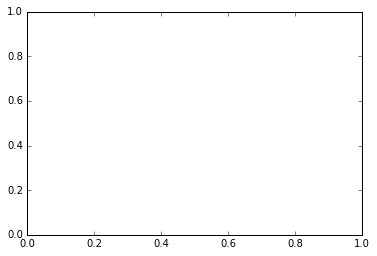

In [40]:
plt.subplot(1,1,1)

or

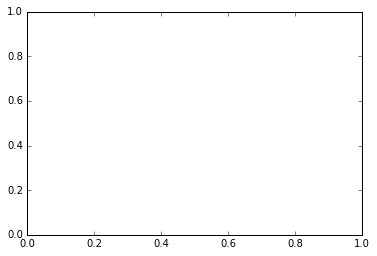

In [41]:
plt.subplot(111)

These are again optional if you only have one panel in your figure, but again it’s generally better to be explicit. The arguments for the second form are (rows, columns, subfig), specifying the number of rows of panels, the number of columns and which one you want to draw now (which is in the range 1 - rows\*colums). So if you have twelve panels and you wanted to select the seventh, you would use one of

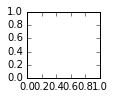

In [42]:
plt.subplot(3,4,7)

or

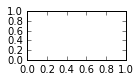

In [43]:
plt.subplot(4,3,7)

depending on how many rows and columns you used. Subfigures/subplots are numbered as if read like text: left-right and top-bottom. If rows\*columns is less than 10, you can use the top form without the commas e.g. `(321)` instead of `(3,2,1)`, but you might consider this to be less explicit.

#### Simple matplotlib plots

Now, we can make up some data and plot it as a bar chart. The first thing is to create a list containing the heights of some bars, for which we can use:

In [44]:
barHeights = range(20,0,-1)

We also need to specify where each of the bars will be drawn. This is the x-coordinate of the bottom left corner of the bar. For this we will use:

In [45]:
positions = range(20)

Now we can draw the bar itself with

<Container object of 20 artists>

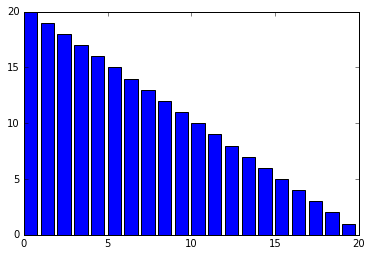

In [46]:
plt.bar(positions, barHeights)

In [47]:
plt.show() # you might need to run this line for your plot to appear

and the chart should appear in the window. You will notice that the figure has rescaled to fit the data and the axes are just labelled with numbers. There are lots of ways to tweak the figures, such as the `plt.xlabel()` and `plt.ylabel()` methods, which put titles on the axes, or `plt.title()`, which puts a title on the plot.

Of course, what we really want to do is plot the data from our file of sites and taxa. To make it as easy as possible to compare the distributions at the different sites, we want to plot all of the data in a single figure. To help us do this, we are going to define a function to plot the figure, then we can pass the data for each figure into the function, one site at a time. We haven’t done this before, so I will give you the code for the function:

In [48]:
def doBarChart(heights, labels, title, rows, columns, subplot):
    plt.subplot(rows, columns, subplot)
    plt.bar(range(len(labels)), heights)
    plt.title(title)
    plt.xlabel('Taxon')
    plt.ylabel('Abundance')
    plt.axis([0, len(labels), 0, 25000])
    tickPos = []
    for pos in range(len(labels)):
        tickPos.append(pos+0.4)
    plt.xticks(tickPos,labels)

This function takes a list of bar heights, a list of labels, a string to use as the title, then the number of rows and columns and the subplot number. First, the function passes these last three to `plt.subplot()` to initialise a new subplot on the figure. It then draws the bar chart, adds the title, labels the axes, and sets the minimum and maximum values for the axes. The last fiddly bit is to create a new list for the labels. By default, when you draw a bar chart, the widths of the bars are 0.8 units. So, we create a new list of positions which are offset by 0.4 units, so that the labels will centred relative to the bars. You can now add this function definition to the top of your program file along with the import statements and you will have everything you need to create the multi-panel figure. 

#### _Exercise 5.6_

Plot all of the data that you read from the file earlier into a single figure of bar plots for each site. This is challenging, but take it bit by bit and you should be able to do it.  
* You will need to start by calling `plt.figure(1)`, then start a loop over the sites. 
* In that loop, you need to 
  * gather the data for the bar heights (the counts),
  * then call the `doBarChart` function, passing in the row heights, labels, the site name as a title and the number of rows, columns and subplot number. 
* Once you have it working like that, try changing the program so that the sites and taxon IDs are in alphabetical order. 
* Then use the plot configuration window to tidy up the figure and save it.  

You should be able to get it to look as below.

![](images/exercise5_6example.png)

#### Alternatives to matplotlib

The `matplotlib` library is very powerful and extremely flexible, and it is still widely used, but I find the interface a little hard to work with and it is often confusing for beginners. Over recent years, the range of options for plotting data in Python has expanded, with several new modules being introduced that make it easy to create many standard types of plot.

One example is the `bokeh` plotting library, which can be used to create attractive, interactive plots that render in HTML. To provide a comparison of the two approaches, we'll use one of the standard chart-building functions in `bokeh` here to plot the same data as above.

In [49]:
from bokeh.charts import Bar

This statement imports only the function `Bar` from the `charts` library of the module `bokeh`. The `charts` library of `bokeh` provides a collection of functions that make it very easy to plot common types of figure - in this case a bar chart. In addition to this function, we will need two more - one to tell Python which file we want to write the HTML output to, and another to tell Python to create the figure. Both of these functions are also available through the `bokeh.charts` library, and we can import them with the same syntax as above.

In [50]:
from bokeh.charts import Bar, output_file, output_notebook, show 
#This is the same as importing each function on a separate line, but saves us some space

#### Simple bokeh Plots

Ok, we now have `bokeh` loaded and ready to go, and we can get on with trying to plot a series of bar charts of our data. In the end, we will generate some fairly pretty plots, one for each site where data was collected. Each individual bar chart will be created with the `Bar` function that we have just imported. This function has a lot of options that control the appearance of the chart that is produced, but at its simplest it requires only a dictionary object containing the data to be plotted:

In [51]:
data = dict(x=list(range(0,21)), y=list(range(0,21)))
myFirstPlot = Bar(data, 'x', 'y')

To view this figure, we need to use the other two functions that we imported. I will use `output_notebook()` here, to render the plot directly into the Jupyter Notebook that these course materials are written in.

In [52]:
output_notebook()

Loading BokehJS ...

If you are working within the Python/IPython shell, you should use `output_file()`, a function that specifies the name of the file to which the figure is written.

```Python
output_file('myFirstPlot.html') # call the file whatever you like, but you should use a .html extension
```

And `show()` is used to tell Python that you are done creating the plot and want to output it:

In [53]:
show(myFirstPlot)

Great! We've produced our first `bokeh` figure! You might have noticed that the scaling of axes has been taken care of for you, and there is a toolbar along the top of the plot. Included in these tools is panning and scroll zooming, alowing you to zoom in and out of the plot and navigate around to better interrogate plotted data. This can be really helpful, but can also get a little annoying when we want our view of the data to remain static. That's ok: it's really easy to switch off. Let's do that, at the same time as adding a title and axis names to the plot:

In [54]:
myFirstPlot = Bar(data, 'x', 'y', title='My First Plot', tools='', xlabel='number', ylabel='height')
show(myFirstPlot)

Hopefully, you can understand what we did there. As well as the `data` object, containing the values that we wanted to plot out, we passed several additional arguments to the `Bar` function. These arguments alterred the figure that was output. The arguments all have logical names - `title`, `xlabel` etc - and there are other arguments that we could specify. If you want to learn about them, you can find all of the `bokeh.charts` documentation [here](http://bokeh.pydata.org/en/latest/docs/user_guide/charts.html#userguide-charts).

The `charts` library also contains several other functions for common types of plot, and `bokeh.io` provides functions to display these plots together. For example, below we will create a scatter plot and display that alongside our bar chart in the output:

In [55]:
from bokeh.charts import Scatter
from bokeh.io import hplot
data2 = {'X': [0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7],
         'Y': [1,2,1,2,1,2,1,2,3,1,2,3,3,3,2,1],
         'S': ['A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B']}
print(data2)
mySecondPlot = Scatter(data2, x='X', y='Y', color='S', legend='top_right')
layout = hplot(myFirstPlot, mySecondPlot)
show(layout)

{'Y': [1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 3, 3, 2, 1], 'S': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], 'X': [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]}


These examples should have given you an understanding of the basics of creating and laying out charts with `bokeh`. Now, you will apply this knowledge to plot out the data that was read and stored from the file earlier.

#### _Exercise 5.6_

Similarly to what you did before with `matplotlib`, plot all of the data that you read from the file earlier into a single file of bar plots, one for each site. This is challenging, but take it bit by bit and you should be able to do it.  
* You will need to start by declaring the name of the output HTML file.
* Next, start with a loop over the sites. 
* In that loop, you need to 
  * gather the data for the bar heights (the counts),
  * then call the `Bar` function, passing in the row heights, a list of labels for the bars (the taxon IDs) and the site name as a title for the chart. 
* Once you have it working like that, try changing the program so that the sites and taxon IDs are in alphabetical order. 
* Then try changing the color of the bars, so that each taxon is represented in a different color. Make sure that this coloring is consistent across your plots.  

You might need to refer to the `help()` documentation and the online user guide linked above for the plotting functions to achieve everything listed above, but with a little time and effort, you should be able to get your plots to look as below.

If you are really adventurous, plot all of the data on a single set of axes, with the data interleaved and the bars for different sites in different colours.

After you have finished on this exercise, or if you get really stuck and need to look at a solution, take a look at [this notebook](http://nbviewer.ipython.org/github/tobyhodges/ITPP/blob/v2/Exercise5_6WalkthroughBokeh.ipynb), which runs through my way of producing the site plots with a different bar color for each taxon.

#### Summary

* Files are opened with the `open()` command, and this returns a file object.
* Methods of the file object, such as `.readline()` or `.readlines()` can be used to get data from the file.
* Files can also be used as iterable data type in `for` statements (and other contexts).
* Python doesn’t convert data types automatically, so you need to use functions like `str()` and `int()` to convert between strings and numbers.
* Python modules provide additional functionality for the language, and can perform many common data analysis tasks. 